In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os
import scipy

In [2]:
import CalcParaMaps
import CTPPreprocess

In [3]:
fileDir = '/home/dwu/trainData/Noise2Noise/train/ctp/phantom/'

In [4]:
def ReadImg(filename, iSlice, nx = 256, ny = 256):
    with open(filename, 'rb') as f:
        f.seek(nx*ny*iSlice*4)
        img = np.fromfile(f, np.float32, nx*ny).reshape([nx,ny,1])
    
    return img

In [36]:
imgs = []
nFrames = 50
iSlice = 150
nx = 256
ny = 256
for i in range(nFrames):
    img = ReadImg(os.path.join(fileDir, str(i+1)), iSlice)[...,np.newaxis]
    imgs.append(img)
imgs = np.concatenate(imgs, -1)

In [37]:
cbf0 = ReadImg(os.path.join(fileDir, 'cbf'), iSlice)
cbv0 = ReadImg(os.path.join(fileDir, 'cbv'), iSlice)
mtt0 = ReadImg(os.path.join(fileDir, 'mtt'), iSlice)
ncct = ReadImg(os.path.join(fileDir, 'baseline'), iSlice)

In [38]:
ctps = imgs - imgs[...,[1]]
mask = np.where(ctps[...,25] > 0, 1, 0)

In [44]:
aif, _ = CTPPreprocess.GetVOF(ctps)
aif[aif < 0] = 0

In [45]:
cbf, cbv, mtt = CalcParaMaps.CalcParaMaps(ctps, mask, method='tikh', lam = 0.3, kappa=1, rho=1, 
                                          aif = np.copy(aif), useCircConv=True, N=None)

In [46]:
facMask = np.where(ctps[...,25] * mask < 9, 1, 0) * mask
cbfFac = np.sum(cbf0 * facMask) / np.sum(cbf * facMask)
print (cbfFac)
cbf *= cbfFac
mtt /= cbfFac

2.8836333451807468


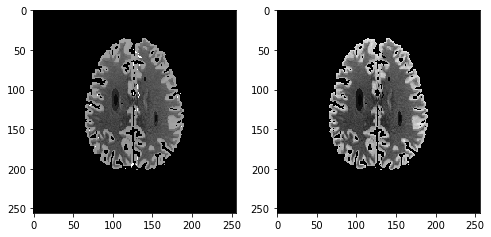

In [47]:
plt.figure(figsize=[8,4])
plt.subplot(121);plt.imshow(cbf[...,0], 'gray', vmin=0, vmax=75)
plt.subplot(122);plt.imshow(cbf0[...,0], 'gray', vmin=0, vmax=75)

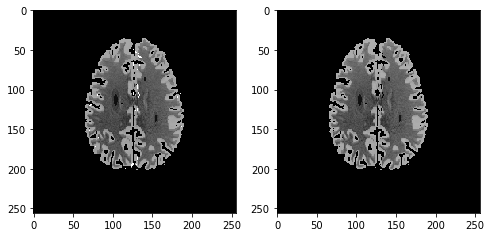

In [48]:
plt.figure(figsize=[8,4])
plt.subplot(121);plt.imshow(cbv[...,0], 'gray', vmin=0, vmax=5)
plt.subplot(122);plt.imshow(cbv0[...,0], 'gray', vmin=0, vmax=5)

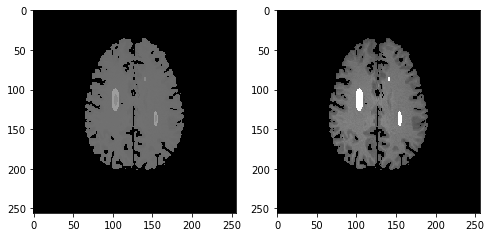

In [49]:
plt.figure(figsize=[8,4])
plt.subplot(121);plt.imshow(mtt[...,0], 'gray', vmin=0, vmax=10)
plt.subplot(122);plt.imshow(mtt0[...,0], 'gray', vmin=0, vmax=10)